In [506]:
#Section 1: Decision Tree
#Single class decision tree 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Loading the dataset
test_data = pd.read_csv('TargetData.csv')


#Print the first 5 rows of the dataframe.
test_data.head()

#X consists of 58 features. Each feature represents 1 test in the long test flow.
X = test_data.drop(["ID","SB","COL","Margin","Block","ROW"],axis = 1)
#Y can be one of ROW,COL,SB. ROW means the failure is on a row of memory array. 
#COL means the failure is on a column of the cell array.
#SB is single bit failure inside the memory.
y = test_data.ROW #COL #SB

In [507]:
#post pruning function on decision tree
from sklearn.tree._tree import TREE_LEAF

def is_leaf(inner_tree, index):
    # Check whether node is leaf node
    return (inner_tree.children_left[index] == TREE_LEAF and 
            inner_tree.children_right[index] == TREE_LEAF)

def prune_index(inner_tree, decisions, index=0):
    # Start pruning from the bottom - if we start from the top, we might miss
    # nodes that become leaves during pruning.
    # Do not use this directly - use prune_duplicate_leaves instead.
    if not is_leaf(inner_tree, inner_tree.children_left[index]):
        prune_index(inner_tree, decisions, inner_tree.children_left[index])
    if not is_leaf(inner_tree, inner_tree.children_right[index]):
        prune_index(inner_tree, decisions, inner_tree.children_right[index])

    # Prune children if both children are leaves now and make the same decision:     
    if (is_leaf(inner_tree, inner_tree.children_left[index]) and
        is_leaf(inner_tree, inner_tree.children_right[index]) and
        (decisions[index] == decisions[inner_tree.children_left[index]]) and 
        (decisions[index] == decisions[inner_tree.children_right[index]])):
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
        ##print("Pruned {}".format(index))

def prune_duplicate_leaves(mdl):
    # Remove leaves if both 
    decisions = mdl.tree_.value.argmax(axis=2).flatten().tolist() # Decision for each node
    prune_index(mdl.tree_, decisions)

In [508]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=2, stratify=y)

from sklearn.tree import DecisionTreeClassifier

#select best depth
max_accuracy=0
best_depth=12
best_impurity_decrease=0.0001
best_weight_fraction_leaf=0.001
for DEPTH in range(12,21,1):
    dt = DecisionTreeClassifier(criterion='entropy',max_depth=DEPTH,random_state=0,min_impurity_decrease=0.0001,min_weight_fraction_leaf=0.001)
    dt.fit(X_train, y_train)
    #post_pruning
    prune_duplicate_leaves(dt)

    print(DEPTH,dt.score(X_test, y_test))
    if dt.score(X_test, y_test)>max_accuracy: 
        max_accuracy=dt.score(X_test, y_test)
        best_depth=DEPTH

#select best impurity decrease
for impurity_decrease in range(5,15,1):

    dt = DecisionTreeClassifier(criterion='entropy',max_depth=best_depth,random_state=0,min_impurity_decrease=impurity_decrease*0.00001,min_weight_fraction_leaf=0.001)
    dt.fit(X_train, y_train)
    #post_pruning
    prune_duplicate_leaves(dt)

    print(best_depth,impurity_decrease,dt.score(X_test, y_test))
    if dt.score(X_test, y_test)>max_accuracy: 
        max_accuracy=dt.score(X_test, y_test)
        best_impurity_decrease=impurity_decrease*0.00001

#select best weight fraction leaf
for weight_fraction_leaf in range(5,15,1):
    dt = DecisionTreeClassifier(criterion='entropy',max_depth=best_depth,random_state=0,min_impurity_decrease=best_impurity_decrease,min_weight_fraction_leaf=weight_fraction_leaf*0.0001)
    dt.fit(X_train, y_train)
    #post_pruning
    prune_duplicate_leaves(dt)

    print(best_depth,best_impurity_decrease,weight_fraction_leaf,dt.score(X_test, y_test))
    if dt.score(X_test, y_test)>max_accuracy: 
        max_accuracy=dt.score(X_test, y_test)
        best_weight_fraction_leaf=weight_fraction_leaf*0.0001

        
    

dt = DecisionTreeClassifier(criterion='entropy',max_depth=best_depth,random_state=0,min_impurity_decrease=best_impurity_decrease,min_weight_fraction_leaf=best_weight_fraction_leaf)
dt.fit(X_train, y_train)    

#post_pruning
prune_duplicate_leaves(dt)

print("selected depth: {:d}".format(best_depth))
print("selected best_impurity_decrease: {:.8f}".format(best_impurity_decrease))
print("selected best_weight_fraction_leaf: {:.8f}".format(best_weight_fraction_leaf))
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

12 0.8195926285160039
13 0.8215324927255092
14 0.8205625606207565
15 0.8186226964112512
16 0.8205625606207565
17 0.8205625606207565
18 0.8205625606207565
19 0.8166828322017459
20 0.8186226964112512
13 5 0.8215324927255092
13 6 0.8215324927255092
13 7 0.8215324927255092
13 8 0.8215324927255092
13 9 0.8215324927255092
13 10 0.8215324927255092
13 11 0.8215324927255092
13 12 0.8215324927255092
13 13 0.8215324927255092
13 14 0.8215324927255092
13 0.0001 5 0.8176527643064986
13 0.0001 6 0.8176527643064986
13 0.0001 7 0.8176527643064986
13 0.0001 8 0.8176527643064986
13 0.0001 9 0.8176527643064986
13 0.0001 10 0.8215324927255092
13 0.0001 11 0.8215324927255092
13 0.0001 12 0.8215324927255092
13 0.0001 13 0.8215324927255092
13 0.0001 14 0.8215324927255092
selected depth: 13
selected best_impurity_decrease: 0.00010000
selected best_weight_fraction_leaf: 0.00100000
Accuracy on training set: 0.847
Accuracy on test set: 0.822


In [509]:
y_pred = dt.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[646  47]
 [137 201]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       693
           1       0.81      0.59      0.69       338

    accuracy                           0.82      1031
   macro avg       0.82      0.76      0.78      1031
weighted avg       0.82      0.82      0.81      1031



In [510]:
#DT visualizatin method 1

from sklearn.tree import export_graphviz

dotfile = open("dt2.dot", 'w')

export_graphviz(dt, out_file=dotfile,feature_names = X.columns,class_names=['0','1'])
dotfile.close()
# Copying the contents of the created file ('dt2.dot' ) to a graphviz rendering agent at http://webgraphviz.com/
# check out https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html



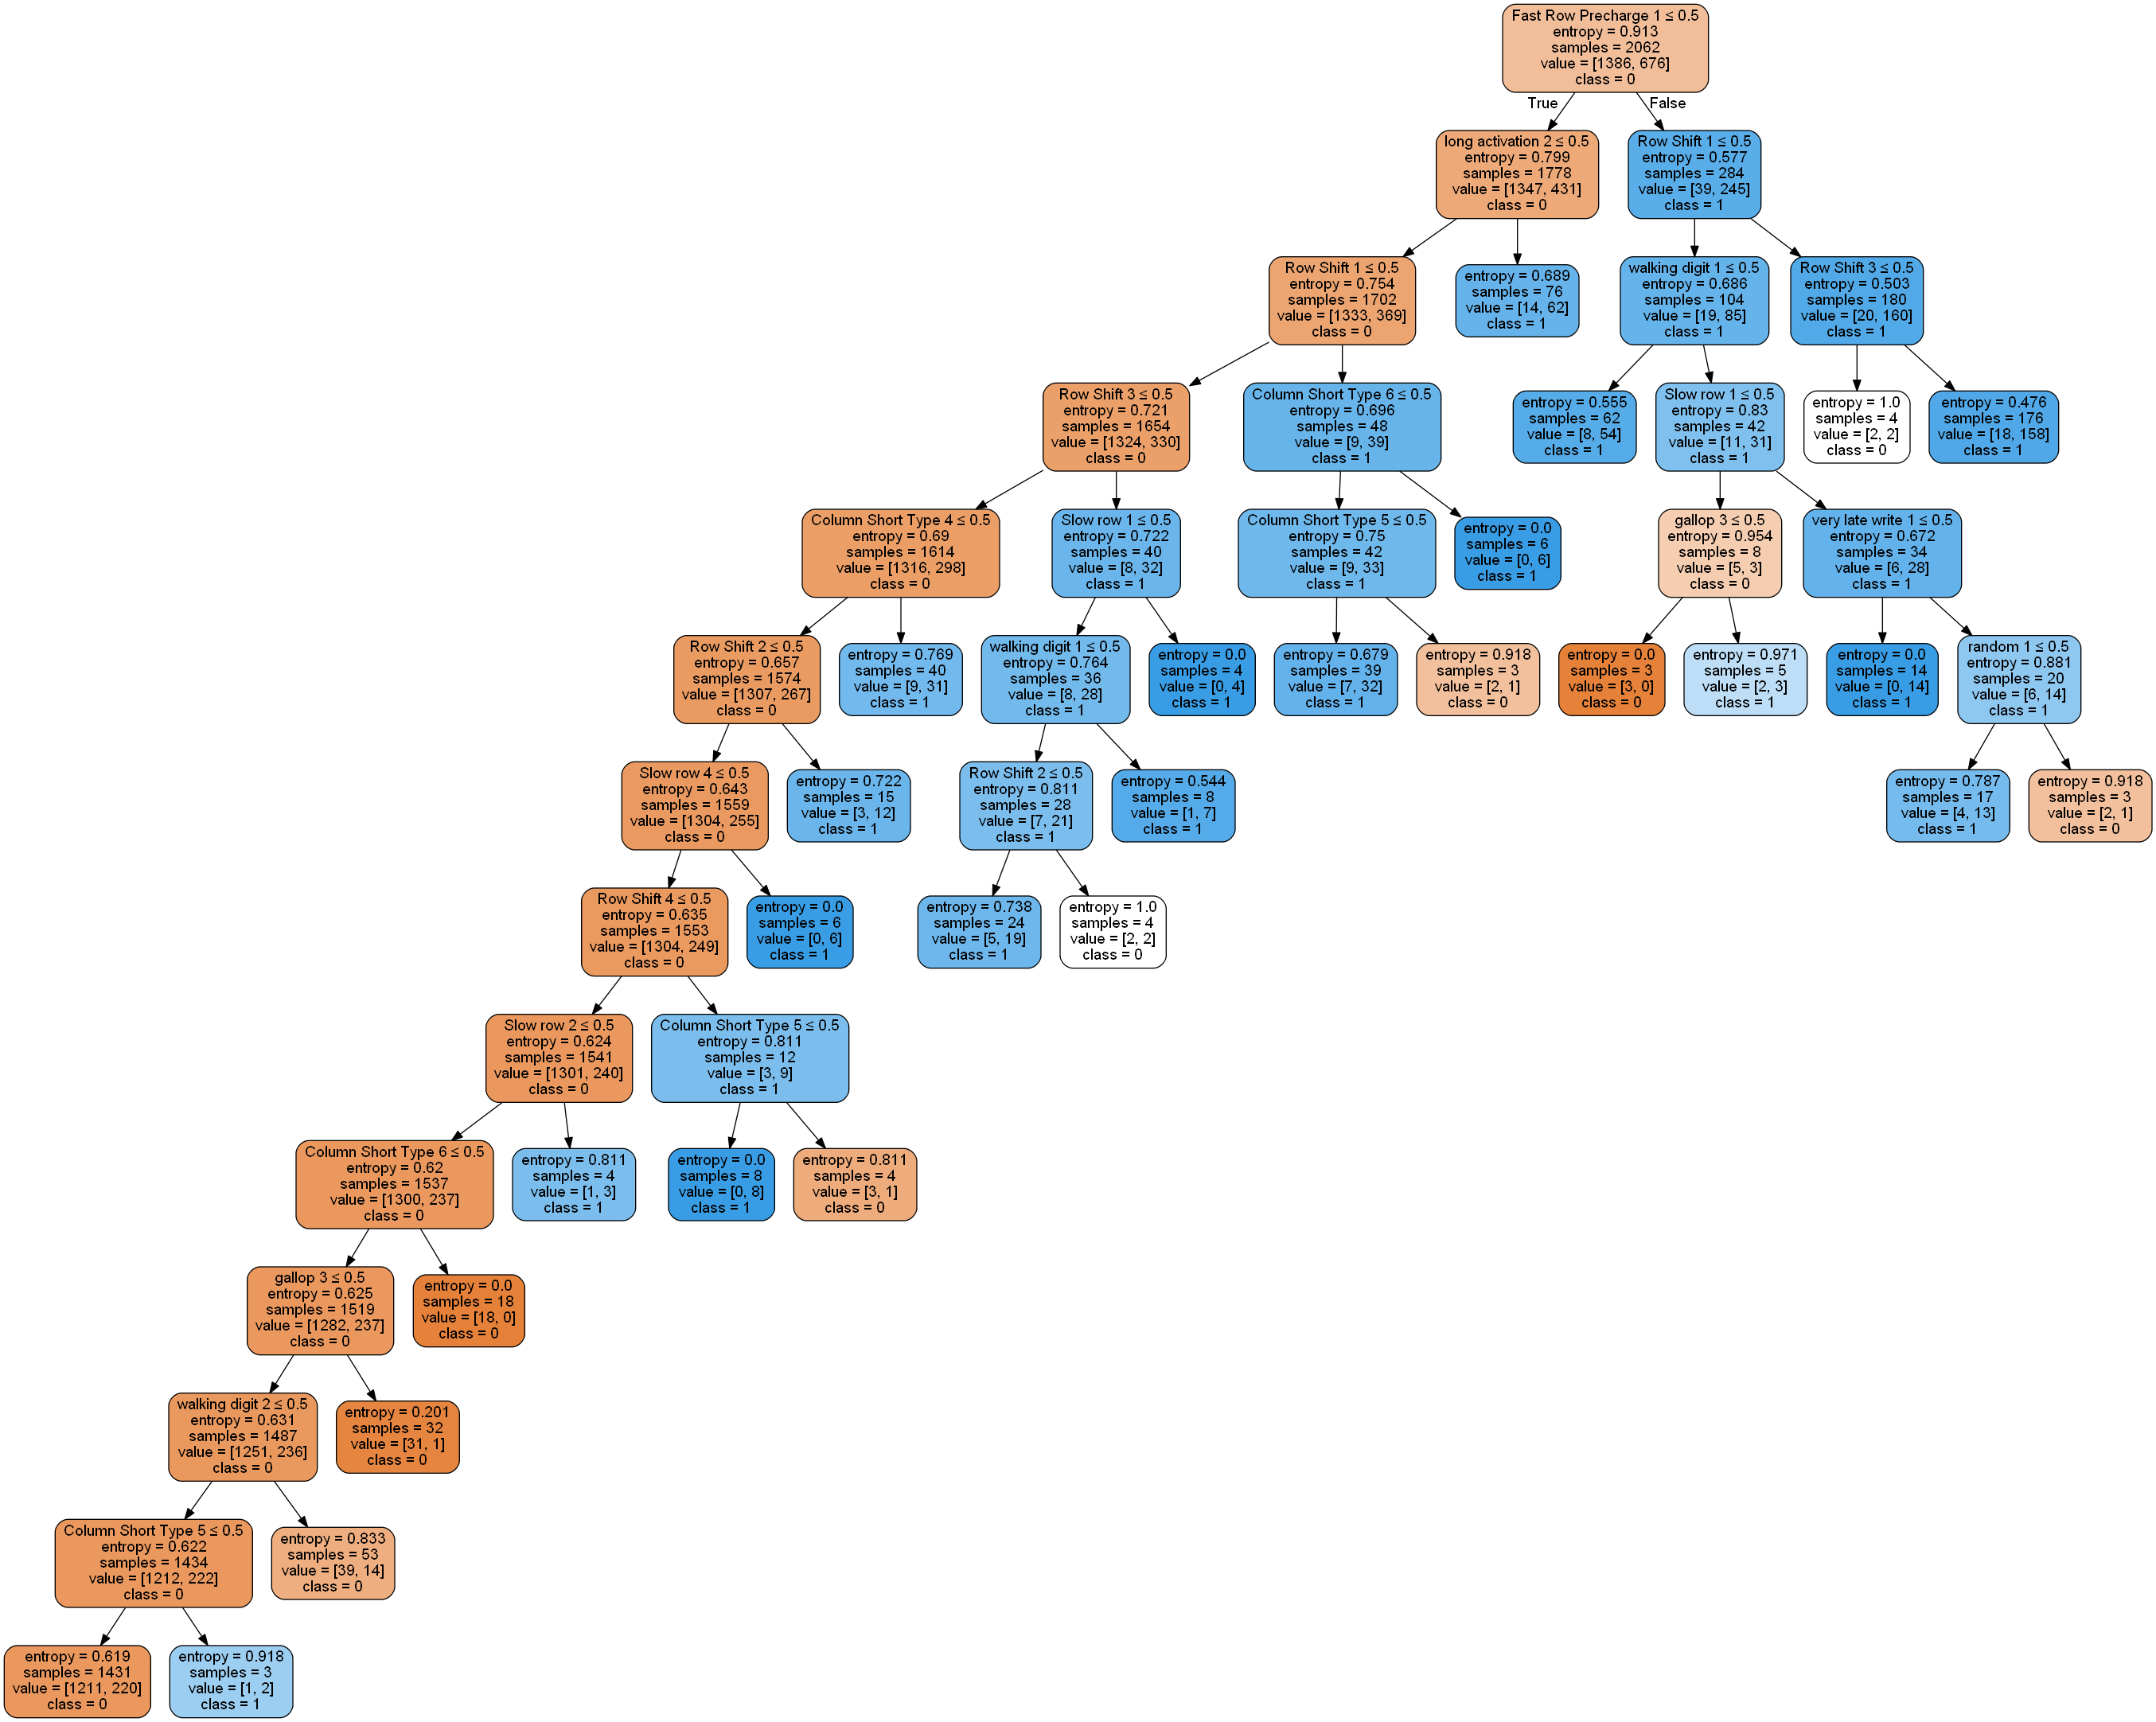

In [511]:
#DT visualizatin method 3
#!conda install -y pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
#os.environ["PATH"] += os.pathsep + 'C:/Users/boonping/graphviz-2.38/release/bin'

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('testClassified.png')
Image(graph.create_png())

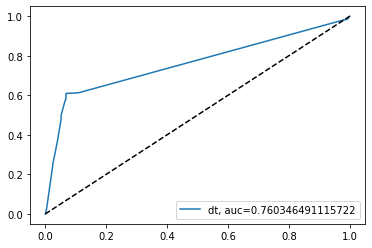

In [512]:
from sklearn import metrics

y_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="dt, auc="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.show()

In [513]:
print(dt.feature_importances_)
#print(sorted(dt.feature_importances_))

ranked_feature=[]
for i in range(58):
    ranked_feature.append('')
sorted_importance=sorted(dt.feature_importances_)
for i in range( len(dt.feature_importances_) ):
    if dt.feature_importances_[i]>0.20*sorted_importance[-1] or sorted_importance.index(dt.feature_importances_[i]) > len(dt.feature_importances_)-best_depth-1:
        #print(i)
        ranked_feature[57-sorted_importance.index(dt.feature_importances_[i])]=test_data.columns[i+1]
        
for f in ranked_feature:
    if f != "":
        print(f)
    

[0.         0.         0.         0.46199445 0.09306486 0.
 0.00812766 0.00887882 0.         0.         0.         0.00395213
 0.00446376 0.         0.         0.00787202 0.         0.13123148
 0.         0.0763839  0.         0.         0.         0.
 0.01038585 0.03414878 0.08160467 0.00231421 0.02447877 0.
 0.01804859 0.         0.         0.         0.         0.02324498
 0.         0.         0.         0.00980508 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Fast Row Precharge 1
long activation 2
Row Shift 1
Row Shift 3
Column Short Type 4
Row Shift 2
Slow row 4
Row Shift 4
Column Short Type 5
gallop 3
Column Short Type 6
Slow row 1
very late write 1


In [514]:
#multi-class decision tree which will be evaluate to choose the best method

#X = test_data.drop(["ID","SB","COL","Margin","Block","ROW"],axis = 1)
y = test_data.SB+2*test_data.COL+4*test_data.ROW
'''
for r in range(len(test_data)):
    print(test_data.iloc[r].SB,test_data.iloc[r].COL,test_data.iloc[r].ROW,y[r])
raise
'''

#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=2, stratify=y)

from sklearn.tree import DecisionTreeClassifier

#select best depth
max_accuracy=0
best_depth=12
best_impurity_decrease=0.0001
best_weight_fraction_leaf=0.001
for DEPTH in range(12,21,1):
    dt = DecisionTreeClassifier(criterion='entropy',max_depth=DEPTH,random_state=0,min_impurity_decrease=0.0001,min_weight_fraction_leaf=0.001)
    dt.fit(X_train, y_train)
    #post_pruning
    prune_duplicate_leaves(dt)

    print(DEPTH,dt.score(X_test, y_test))
    if dt.score(X_test, y_test)>max_accuracy: 
        max_accuracy=dt.score(X_test, y_test)
        best_depth=DEPTH
#select best impurity decrease        
for impurity_decrease in range(5,15,1):

    dt = DecisionTreeClassifier(criterion='entropy',max_depth=best_depth,random_state=0,min_impurity_decrease=impurity_decrease*0.00001,min_weight_fraction_leaf=0.001)
    dt.fit(X_train, y_train)

    #post_pruning
    prune_duplicate_leaves(dt)

    print(best_depth,impurity_decrease,dt.score(X_test, y_test))
    if dt.score(X_test, y_test)>max_accuracy: 
        max_accuracy=dt.score(X_test, y_test)
        best_impurity_decrease=impurity_decrease*0.00001
#select weight fraction leaf        
for weight_fraction_leaf in range(5,15,1):
    dt = DecisionTreeClassifier(criterion='entropy',max_depth=best_depth,random_state=0,min_impurity_decrease=best_impurity_decrease,min_weight_fraction_leaf=weight_fraction_leaf*0.0001)
    dt.fit(X_train, y_train)
    #post_pruning
    prune_duplicate_leaves(dt)

    print(best_depth,best_impurity_decrease,weight_fraction_leaf,dt.score(X_test, y_test))
    if dt.score(X_test, y_test)>max_accuracy: 
        max_accuracy=dt.score(X_test, y_test)
        best_weight_fraction_leaf=weight_fraction_leaf*0.0001

        
    

dt = DecisionTreeClassifier(criterion='entropy',max_depth=best_depth,random_state=0,min_impurity_decrease=best_impurity_decrease,min_weight_fraction_leaf=best_weight_fraction_leaf)
dt.fit(X_train, y_train)    

#post_pruning
prune_duplicate_leaves(dt)

print("selected depth: {:d}".format(best_depth))
print("selected best_impurity_decrease: {:.8f}".format(best_impurity_decrease))
print("selected best_weight_fraction_leaf: {:.8f}".format(best_weight_fraction_leaf))
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

12 0.5257032007759457
13 0.5257032007759457
14 0.5286129970902037
15 0.5412221144519883
16 0.5431619786614937
17 0.5499515033947624
18 0.5470417070805044
19 0.5470417070805044
20 0.5548011639185257
20 5 0.5548011639185257
20 6 0.5548011639185257
20 7 0.5548011639185257
20 8 0.5548011639185257
20 9 0.5548011639185257
20 10 0.5548011639185257
20 11 0.5548011639185257
20 12 0.5548011639185257
20 13 0.5548011639185257
20 14 0.5548011639185257
20 0.0001 5 0.5344325897187197
20 0.0001 6 0.5344325897187197
20 0.0001 7 0.5344325897187197
20 0.0001 8 0.5344325897187197
20 0.0001 9 0.5344325897187197
20 0.0001 10 0.5548011639185257
20 0.0001 11 0.5548011639185257
20 0.0001 12 0.5548011639185257
20 0.0001 13 0.5557710960232783
20 0.0001 14 0.5557710960232783
selected depth: 20
selected best_impurity_decrease: 0.00010000
selected best_weight_fraction_leaf: 0.00130000
Accuracy on training set: 0.583
Accuracy on test set: 0.556


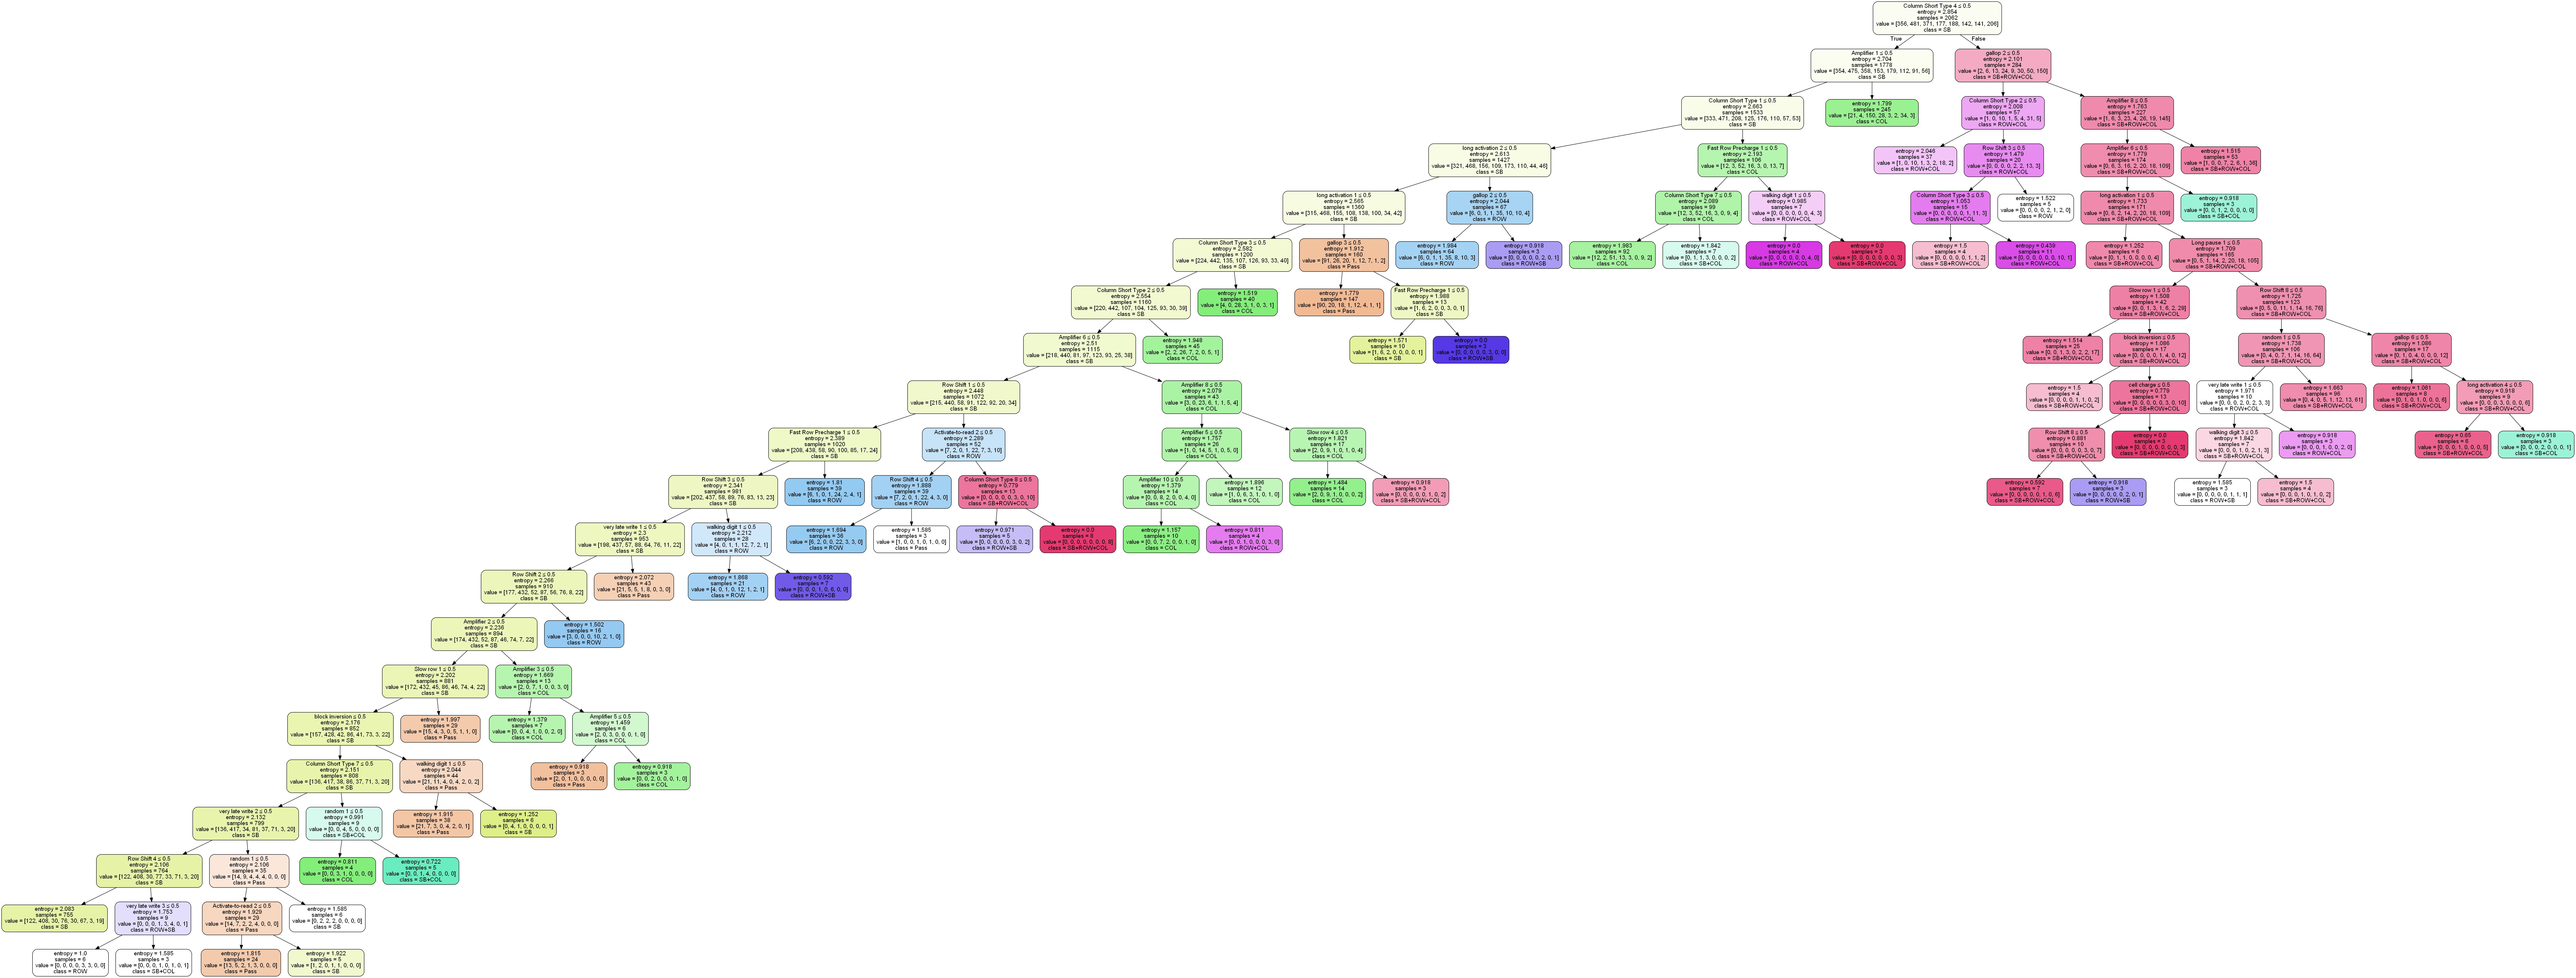

In [515]:
#DT visualizatin method 3
#!conda install -y pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
#os.environ["PATH"] += os.pathsep + 'C:/Users/boonping/graphviz-2.38/release/bin'

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['Pass','SB','COL','SB+COL','ROW','ROW+SB','ROW+COL','SB+ROW+COL'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('testClassified.png')
Image(graph.create_png())

In [516]:
#multi-class decision tree
y_pred = dt.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[ 74  64  25   0  14   1   0   0]
 [ 15 214   3   0   2   1   1   5]
 [ 10  20 147   0   4   0   4   1]
 [  5  46  22   2   4   0   2   8]
 [ 15  14   5   0  56   0   3   1]
 [  4  41   0   0  11   3   2   9]
 [  2   5  35   2   6   0   9  11]
 [  3   7   6   3   4   3   9  68]]
              precision    recall  f1-score   support

           0       0.58      0.42      0.48       178
           1       0.52      0.89      0.66       241
           2       0.60      0.79      0.69       186
           3       0.29      0.02      0.04        89
           4       0.55      0.60      0.57        94
           5       0.38      0.04      0.08        70
           6       0.30      0.13      0.18        70
           7       0.66      0.66      0.66       103

    accuracy                           0.56      1031
   macro avg       0.48      0.44      0.42      1031
weighted avg       0.52      0.56      0.50      1031



In [517]:
print(dt.feature_importances_)
#print(sorted(dt.feature_importances_))

ranked_feature=[]
for i in range(58):
    ranked_feature.append('')
sorted_importance=sorted(dt.feature_importances_)
for i in range( len(dt.feature_importances_) ):
    if dt.feature_importances_[i]>0.20*sorted_importance[-1] or sorted_importance.index(dt.feature_importances_[i]) > len(dt.feature_importances_)-best_depth-1:
        #print(i)
        ranked_feature[57-sorted_importance.index(dt.feature_importances_[i])]=test_data.columns[i+1]
        
for f in ranked_feature:
    if f != "":
        print(f)
    

[0.00062661 0.04361388 0.         0.04645815 0.03259558 0.05782243
 0.02111512 0.01670352 0.04052204 0.00312957 0.         0.01668266
 0.         0.03810797 0.13487857 0.         0.         0.04865519
 0.04232219 0.22878295 0.         0.         0.01354784 0.00101772
 0.00882373 0.01834961 0.02359795 0.00720859 0.0035302  0.
 0.         0.00978454 0.         0.01796197 0.00081373 0.01345323
 0.         0.01807549 0.00156479 0.         0.         0.00326762
 0.         0.04528399 0.         0.01748757 0.         0.00238525
 0.00076489 0.         0.01102351 0.         0.00250749 0.
 0.         0.00213364 0.         0.00540022]
Column Short Type 4
Amplifier 1
Column Short Type 1
long activation 2
Fast Row Precharge 1
Amplifier 6
long activation 1
gallop 2
Column Short Type 2
Column Short Type 3
Row Shift 1
Row Shift 3
very late write 1
Row Shift 2
Activate-to-read 2
Amplifier 2
Column Short Type 7
Slow row 1
walking digit 1
block inversion


In [518]:
scaler = StandardScaler()  
scaler.fit(X_train)
X_test1=X_test
X_test2=X_test
X_train = scaler.transform(X_train)  
X_test1 = scaler.transform(X_test1)  

from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train)  

predictions = mlp.predict(X_test1)  


print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(mlp.coefs_[0][1])

Iteration 1, loss = 2.49309191
Iteration 2, loss = 2.22851954
Iteration 3, loss = 2.06223267
Iteration 4, loss = 1.99216343
Iteration 5, loss = 1.96039075
Iteration 6, loss = 1.93280436
Iteration 7, loss = 1.90790991
Iteration 8, loss = 1.88687764
Iteration 9, loss = 1.86622635
Iteration 10, loss = 1.84893289
Iteration 11, loss = 1.83267888
Iteration 12, loss = 1.81686183
Iteration 13, loss = 1.80243573
Iteration 14, loss = 1.78760275
Iteration 15, loss = 1.77384167
Iteration 16, loss = 1.76074073
Iteration 17, loss = 1.74793953
Iteration 18, loss = 1.73550760
Iteration 19, loss = 1.72386398
Iteration 20, loss = 1.71246292
Iteration 21, loss = 1.70176832
Iteration 22, loss = 1.69048343
Iteration 23, loss = 1.68002403
Iteration 24, loss = 1.66957676
Iteration 25, loss = 1.66003307
Iteration 26, loss = 1.64974067
Iteration 27, loss = 1.64038693
Iteration 28, loss = 1.63075127
Iteration 29, loss = 1.62142390
Iteration 30, loss = 1.61235638
Iteration 31, loss = 1.60394736
Iteration 32, los

Iteration 267, loss = 1.20115847
Iteration 268, loss = 1.20141876
Iteration 269, loss = 1.20131630
Iteration 270, loss = 1.20047607
Iteration 271, loss = 1.20051772
Iteration 272, loss = 1.20063253
Iteration 273, loss = 1.20008208
Iteration 274, loss = 1.19979555
Iteration 275, loss = 1.19912516
Iteration 276, loss = 1.19947423
Iteration 277, loss = 1.19817505
Iteration 278, loss = 1.20025787
Iteration 279, loss = 1.19916823
Iteration 280, loss = 1.19825223
Iteration 281, loss = 1.19774869
Iteration 282, loss = 1.19766484
Iteration 283, loss = 1.19695017
Iteration 284, loss = 1.19709975
Iteration 285, loss = 1.19763070
Iteration 286, loss = 1.19706468
Iteration 287, loss = 1.19642319
Iteration 288, loss = 1.19628949
Iteration 289, loss = 1.19603520
Iteration 290, loss = 1.19586889
Iteration 291, loss = 1.19566293
Iteration 292, loss = 1.19507750
Iteration 293, loss = 1.19458195
Iteration 294, loss = 1.19543156
Iteration 295, loss = 1.19493340
Iteration 296, loss = 1.19501574
Iteration 

In [519]:


feature={}
node_feature=[]

for l in range(10):
    min_weight=mlp.coefs_[0][0:][l].min()
    max_weight=mlp.coefs_[0][0:][l].max()
    if abs(min_weight)>abs(max_weight): max_weight=abs(min_weight)
    max_weight=abs(max_weight)
    for i in range(58):
        weight = mlp.coefs_[0][i][l]
        if weight>0 and weight/max_weight>0.33: 
            if test_data.columns[i+1] not in feature: 
                feature[ test_data.columns[i+1] ]=0
            feature[ test_data.columns[i+1] ]+=1
            node_feature.append(test_data.columns[i+1])
        #elif weight<0 and weight/max_weight>0.33: 
            #if test_data.columns[i+1] not in feature: 
            #    feature[ test_data.columns[i+1] ]=0
            #feature[ test_data.columns[i+1] ]+=1
            #node_feature.append(test_data.columns[i+1])
    #print(node_feature)
    #node_feature=[]
        
#for f in feature: 
#    if feature[f]>5: print(f)
        
    
    

In [520]:
featurelist=[]
feature_freq=[]
notfeature_freq=[]
for testnum in range(58):
    featurelist.append( test_data.columns[testnum+1] )
    feature_freq.append(0)
    notfeature_freq.append(0)

for i in range(len(X_test)):
    if predictions[i]==1:
        total_ones=0
        total_zeros=0
        for testnum in range(58):
            if X_test.iloc[i,testnum]>=0.45: #if transformed X is greater than 0.5
                total_ones+=1
            else:
                total_zeros+=1
        
        for testnum in range(58):
            if X_test1[i][testnum]>=0.45: #if transformed X is greater than 0.5
                feature_freq[testnum]+=1/total_ones
            else:
                notfeature_freq[testnum]+=1/total_zeros
                
#print (X_test[0])
sorted_featurelist=[]
sorted_notfeaturelist=[]
for i in range(58):
    sorted_featurelist.append([])
    sorted_notfeaturelist.append([])
sorted_freq=sorted( feature_freq )                
for i in range(len(feature_freq)):
    if feature_freq[i]>0.25*sorted_freq[-1] or sorted_freq.index( feature_freq[i] )>0.75*58:
        if feature_freq[i]>1.5*notfeature_freq[i]:
            sorted_featurelist[57-sorted_freq.index( feature_freq[i] )]=[featurelist[i],feature_freq[i],notfeature_freq[i]]
        
#positive,negative prediction frequency for selected features with significant importance
for f in sorted_featurelist:
    if f!=[]:
        print(f)    
        

['Long pause 1', 95.83333333333333, 4.289669687726786]
['Long pause 2', 79.16666666666666, 4.587179633920939]
['cell charge', 65.0, 4.852024438239424]
['gallop 2', 17.7, 5.619678763391251]
['walking digit 2', 14.416666666666666, 5.511921864678191]
['gallop 3', 12.366666666666667, 5.725579879818681]
['Activate-to-read 1', 11.642857142857144, 5.524591488543804]


In [521]:
from sklearn.svm import SVC

scaler = StandardScaler()  
scaler.fit(X_train) 
X_train= scaler.transform(X_train)  
#X_test2= scaler.transform(X_test2) 
svm=SVC(kernel="rbf", gamma=5, C=1) 
svm.fit(X_train, y_train)
predictions = svm.predict(X_test1)
svm_pred=predictions
#print(predictions)
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions)) 
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test1, y_test)))
#print(predictions)


[[100  30  27   0  14   1   0   6]
 [ 19 202   2   0   2   0   0  16]
 [ 16   7 139   3   3   0   2  16]
 [  4  37  17   5   3   0   2  21]
 [ 16   8   8   0  57   0   2   3]
 [  4  37   0   0   8   1   0  20]
 [  3   2  31   0   6   0   6  22]
 [  1   5   4   0   3   1   0  89]]
              precision    recall  f1-score   support

           0       0.61      0.56      0.59       178
           1       0.62      0.84      0.71       241
           2       0.61      0.75      0.67       186
           3       0.62      0.06      0.10        89
           4       0.59      0.61      0.60        94
           5       0.33      0.01      0.03        70
           6       0.50      0.09      0.15        70
           7       0.46      0.86      0.60       103

    accuracy                           0.58      1031
   macro avg       0.54      0.47      0.43      1031
weighted avg       0.57      0.58      0.52      1031



In [524]:
#hybrid voting system
#X_raw=X
#y_raw=y
#X_train,X_test,y_train,y_test = train_test_split(X_raw,y_raw,test_size=1/5,random_state=2, stratify=y_raw)
#X=X_test
#y=y_test
td=test_data.drop("ID",axis=1)
L=len(td.SB)
dt_pred=dt.predict(X_test)
dt_score=0
dt_weight=0
#print(confusion_matrix(y_test,dt_pred))  
#print(classification_report(y_test,dt_pred)) 
#Xscaled=scaler.transform(X_test) 
mlp_pred=mlp.predict(X_test1)
mlp_score=0
mlp_weight=0
#print(confusion_matrix(y_test,mlp_pred))  
#print(classification_report(y_test,mlp_pred)) 
#print(svm)
#print(X)
#Xscaled1=scaler.transform(X_test) 
'''
svm_pred=svm.predict(X_test2)
print(confusion_matrix(y_test,svm_pred))  
print(classification_report(y_test,svm_pred)) 
'''
svm_score=0
svm_weight=0
#print(X)
#print(y_test)
#print(svm_pred)
for i in range(58):
    #TrueList=td[ td.iloc[:,i]==1 ]
    
    #l=float(len(TrueList))
    SB1=0 
    COL1=0
    ROW1=0
    dt_SB1=0 
    dt_COL1=0
    dt_ROW1=0
    mlp_SB1=0 
    mlp_COL1=0
    mlp_ROW1=0
    svm_SB1=0 
    svm_COL1=0
    svm_ROW1=0
    for r in range(len(X_test)):
        #print(X_test)
        #raise
        if ( X_test.iloc[r,i] )==0 : continue
        one=0
        for val in (X_test.iloc[r]):
            if val==1: 
                one+=1
        if one==0: continue
        #print(y.iloc[r],(y.iloc[r]&4)>>2)
        #raise,
        SB1+=(y_test.iloc[r]&1)/one
        COL1+=((y_test.iloc[r]&2)>>1)/one
        ROW1+=((y_test.iloc[r]&4)>>2)/one
        if dt_pred[r]&1==1:
            dt_SB1+=1/one
        elif dt_pred[r]&2==2:
            dt_COL1+=1/one
        elif dt_pred[r]&4==4:
            dt_ROW1+=1/one
        if mlp_pred[r]&1==1:
            mlp_SB1+=1/one
        elif mlp_pred[r]&2==2:
            mlp_COL1+=1/one
        elif mlp_pred[r]&4==4:
            mlp_ROW1+=1/one
        if svm_pred[r]&1==1:
            svm_SB1+=1/one
        elif svm_pred[r]&2==2:
            svm_COL1+=1/one
        elif svm_pred[r]&4==4:
            svm_ROW1+=1/one

    total=SB1+COL1+ROW1
    total_dt=dt_SB1+dt_COL1+dt_ROW1
    total_mlp=mlp_SB1+mlp_COL1+mlp_ROW1
    total_svm=svm_SB1+svm_COL1+svm_ROW1
    if total==0: 
        print(test_data.columns[i+1]," is redundant test")
        continue

    print(SB1,COL1,ROW1)
    print(dt_SB1,dt_COL1,dt_ROW1)
    print(mlp_SB1,mlp_COL1,mlp_ROW1)
    print(svm_SB1,svm_COL1,svm_ROW1)
    #raise
        
    
    predict_outcome=[]
    #print(i,l,SB1,COL1,ROW1)
    for clas in ["SB1","COL1","ROW1"]:
        if total==0: continue
        #print(clas,eval(clas))
        if eval(clas)/total>0.5:
            predict_outcome.append(clas)
    #for t
    SB1=0
    COL1=0
    ROW1=0
    for j in range( len(dt_pred) ):
        if X_test.iloc[j,i]==1:
            if dt_pred[j]==1:
                SB1+=1
            elif dt_pred[j]==2:
                COL1+=1
            elif dt_pred[j]==3:
                ROW1+=1
                
    predict_outcome_dt=[]
    for clas in ["SB1","COL1","ROW1"]:
        if total_dt==0: continue
        if eval("dt_"+clas)/total_dt>0.5:
            predict_outcome_dt.append(clas)
            
    if predict_outcome_dt==predict_outcome: 
        dt_score+=l/L
    dt_weight+=l/L

    SB1=0
    COL1=0
    ROW1=0
    for j in range( len(mlp_pred) ):
        if X_test.iloc[j,i]==1:
            if mlp_pred[j]==1:
                SB1+=1
            elif mlp_pred[j]==2:
                COL1+=1
            elif mlp_pred[j]==3:
                ROW1+=1
                
    predict_outcome_mlp=[]
    for clas in ["SB1","COL1","ROW1"]:
        if total_mlp==0: continue
        if eval("mlp_"+clas)/total_mlp>0.5:
            predict_outcome_mlp.append(clas)
            
    if predict_outcome_mlp==predict_outcome: 
        mlp_score+=l/L
    mlp_weight+=l/L

    SB1=0
    COL1=0
    ROW1=0
    for j in range( len(svm_pred) ):
        if X_test.iloc[j,i]==1:
            if svm_pred[j]==1:
                SB1+=1
            elif svm_pred[j]==2:
                COL1+=1
            elif svm_pred[j]==3:
                ROW1+=1
                
    predict_outcome_svm=[]
    for clas in ["SB1","COL1","ROW1"]:
        if total_svm==0: continue
        if eval("svm_"+clas)/total_svm>0.5:
            predict_outcome_svm.append(clas)
    
    
    if predict_outcome_svm==predict_outcome: 
        svm_score+=l/L
    svm_weight+=l/L

    
                
                
                
    print(test_data.columns[i+1],predict_outcome,predict_outcome_dt,predict_outcome_mlp,predict_outcome_svm)
dt_score/=dt_weight
mlp_score/=mlp_weight
svm_score/=svm_weight
print ("feature score [dt,mlp,svm]:", dt_score,mlp_score,svm_score)
dt_score+=dt.score(X_test, y_test)
mlp_score+=mlp.score(X_test1, y_test)
svm_score+=svm.score(X_test1, y_test)
print ("overall score [dt,mlp,svm]:",dt_score,mlp_score,svm_score)

max_score=0
choice=""
for selector in ["dt","mlp","svm"]:
    if eval(selector+"_score")>max_score:
        max_score=eval(selector+"_score")
        choice=selector
print("The final choice is :",choice)  
print("choice details:\n",eval(choice))


60.26130626507628 11.962995170621676 13.030165468811436
67.1272001293616 0.09126984126984126 0.2909090909090909
67.4885457282072 0.020833333333333332 0
67.50937906154053 0 0
cell charge ['SB1'] ['SB1'] ['SB1'] ['SB1']
17.61089197140426 10.965773428099817 13.859063199005353
3.2207591786285805 0.8834267040149393 0
4.2020443938641 0.874363711001642 0.027777777777777776
6.154185882643521 2.033333333333333 0
long activation 1 [] ['SB1'] ['SB1'] ['SB1']
gallop 1  is redundant test
8.003932458910837 5.42774632728074 20.39603609818625
2.732732077809489 1.750093370681606 19.75
4.0152077692354835 1.1898399014778325 19.02777777777778
5.232825448491095 0 19.0
Fast Row Precharge 1 ['ROW1'] ['ROW1'] ['ROW1'] ['ROW1']
6.787162237086306 4.409674507862979 18.87292862814461
3.031730965462437 0.14238095238095236 20.0
3.1366119178433896 0.13749999999999998 20.0
3.2407785845100556 0.03333333333333333 20.0
Row Shift 1 ['ROW1'] ['ROW1'] ['ROW1'] ['ROW1']
4.839821911196284 29.11370993603632 11.26418361498784


4.395154225940363 5.156076458402861 2.787625597841599
4.791730965462436 1.3165223665223664 0
4.686270573364113 0.5219827586206897 0
5.17491999865147 1.0333333333333334 0
Column Short Type 6 [] ['SB1'] ['SB1'] ['SB1']
1.1033817575057467 5.4609497847166315 2.0511631427871317
3.4548146170989837 2.4306926406926403 0.09090909090909091
1.639114761399128 2.3095238095238093 2.0277777777777777
5.143083015367383 0.7083333333333333 0
Amplifier 4 ['COL1'] ['SB1'] [] ['SB1']
0.7700484241724135 4.552616451383297 0.9428298094537987
2.14648128376565 2.8306926406926403 0.09090909090909091
1.305781428065795 3.7345238095238096 0.027777777777777776
2.9014163487007147 2.041666666666667 0
Amplifier 5 ['COL1'] ['COL1'] ['COL1'] ['SB1']
2.0812463211703904 2.196574683901087 2.2014954708494026
2.376964474833877 0.18404761904761904 0
2.3445848908163627 0.18864942528735631 0.027777777777777776
2.5276787605481625 0.03333333333333333 0
long activation 3 [] ['SB1'] ['SB1'] ['SB1']
0.7700484241724135 5.15975930852615